In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [92]:
def pretty_plot(time1: np.array, theta1: np.array,
                theta_dot1: np.array, theta_dot_dot1: np.array,
                kinetic_e1: np.array, pot_e1: np.array,
                
                time2: np.array, theta2: np.array,
                theta_dot2: np.array, theta_dot_dot2: np.array,
                kinetic_e2: np.array, pot_e2: np.array):
    
    
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    fig.tight_layout()
    fig.tight_layout(pad=3.0)

    axs[0,0].set_title("Ángulo en función del tiempo")
    axs[0,0].set_xlabel("Tiempo (segundos)")
    axs[0,0].set_ylabel("Posición en radianes (rad)")
    axs[0,0].plot(time1, theta1)
    axs[0,0].plot(time2, theta2)
    axs[0,0].legend(["E. Cramer", "Ideal"])
    

    axs[0,1].set_title("Velocidad en función del tiempo")
    axs[0,1].set_xlabel("Tiempo (segundos)")
    axs[0,1].set_ylabel("Velocidad angular (mt/s)")
    axs[0,1].plot(time1, theta_dot1)
    axs[0,1].plot(time2, theta_dot2)   
    axs[0,1].legend(["E. Cramer", "Ideal"])

    
    axs[1,0].set_title("Energía cinética en función del tiempo")
    axs[1,0].set_xlabel("Tiempo (segundos)")
    axs[1,0].set_ylabel("Jules")
    axs[1,0].plot(time1, kinetic_e1)
    axs[1,0].plot(time2, kinetic_e2)
    axs[1,0].plot(time1, kinetic_e1 + pot_e1)
    axs[1,0].plot(time2, kinetic_e2 + pot_e2)
    axs[1,0].legend(["E. Cramer", "Ideal", "E. total cramer", "E. total ideal"])

    
    axs[1,1].set_title("Energía potencial en función del tiempo")
    axs[1,1].set_xlabel("Tiempo (segundos)")
    axs[1,1].set_ylabel("Jules")
    axs[1,1].plot(time1, pot_e1)
    axs[1,1].plot(time2, pot_e2)
    axs[1,1].plot(time1, pot_e1 + kinetic_e1)
    axs[1,1].plot(time2, pot_e2 + kinetic_e2)
    axs[1,1].legend(["E. Cramer", "Ideal", "E. total cramer", "E. total ideal"])

    
    plt.show()
    

### 5.  Problema Python Pendulo simple Laboratorio

Para el sistema pendulo (masa atada a una cuerda rigida inextensible) asignando condiciones iniciales grafique
usando el modelo teórico, y el método de Euler-Cromer para ángulos pequeños grafique:

**A) La posición angular como función del tiempo.**
$$$$
**B) Velocidad angular como función del tiempo.**
$$$$
**C) Energía cinética como función del tiempo.**
$$$$
**D) La energía potencial como función del tiempo.**

_La solución a todo esto la ve acontinuación:_

In [153]:
def ideal_mas(m: float,  l: float,
             theta0: float,
             g: float,
             ti: float, tf: float,
             delta: float):
    
    """
    Calcula el movimiento armónico simple sin pérdidas.
    
    m:      masa 
    l:      longitud de la cuerda
    theta0: angulo inicial
    g:      gravedad
    ti:     tiempo inicial
    tf:     tiempo final
    delta: distancia entre punto y punto de la serie de tiempo 
            (tiene que ser menor igual a 1)
    """
    
    time = np.arange(ti, tf, delta)
    npoints = time.shape[0]
    theta0 = theta0*(np.pi/180)
    
    # frecuencia angular o natural del sistema
    w = np.sqrt(g/l)
     
    theta = theta0 * np.cos(time*w)
    theta_dot = -theta0 * w * np.sin(time*w)
    theta_dot_dot = -theta0 * (w**2) * np.cos(time*w)
    
    #energia cinética
    kinetic_e = (1/2) * ((theta_dot * l)**2)* m
    
    #energía potencial gravitacional
    pot_e = m * g * l * (1 - np.cos(theta))
    
    
        
    return time, theta, theta_dot, theta_dot_dot, kinetic_e, pot_e
    

In [106]:
def euler_cromer_mas(m: float,  l: float,
                     theta0: float,
                     g: float,
                     ti: float, tf: float,
                     delta: float, theta_dot_i = 0):
    
    """s
    Calcula el movimiento armónico simple sin pérdidas.
    
    m:      masa 
    l:      longitud de la cuerda
    theta0: angulo inicial
    g:      gravedad
    ti:     tiempo inicial
    tf:     tiempo final
    delta:  distancia entre punto y punto de la serie de tiempo 
            (tiene que ser menor igual a 1)
    """
    
    time = np.arange(ti, tf, delta)
    radians = time
    npoints = time.shape[0]
    theta0 = theta0*(np.pi/180)
    
    # frecuencia angular o natural del sistema
    w = np.sqrt(g/l)
     
    theta = np.zeros((npoints))
    theta[0] = theta0
    
    theta_dot = np.zeros((npoints))
    theta_dot[0] = theta_dot_i
    
    theta_dot_dot = np.zeros((npoints))
    
    #energia cinética
    kinetic_e = np.zeros((npoints))
    
    #energía potencial gravitacional
    pot_e = np.zeros((npoints))
    
    for sec in range( npoints - 1):
        
        theta_dot_dot[sec] = -(w**2)*np.sin(theta[sec])
        
        theta_dot[sec +1] = theta_dot[sec] + (delta * theta_dot_dot[sec])
        theta[sec + 1] = theta[sec] + (theta_dot[sec + 1]*delta)
        
    #energia cinética
    kinetic_e = (1/2) * (theta_dot **2) * (l**2) * m
    
    #energía potencial gravitacional
    pot_e = m * g * l * (1 - np.cos(theta))
    
    
        
    return time, theta, theta_dot, theta_dot_dot, kinetic_e, pot_e
    

In [97]:
time1, theta1, theta_dot1, \
theta_dot_dot1, kinetic_e1, \
pot_e1 = euler_cromer_mas(m=10, l=1,
                          theta0=10,
                          g=9.81,
                          ti=0,
                          tf=1,
                          delta=0.01)

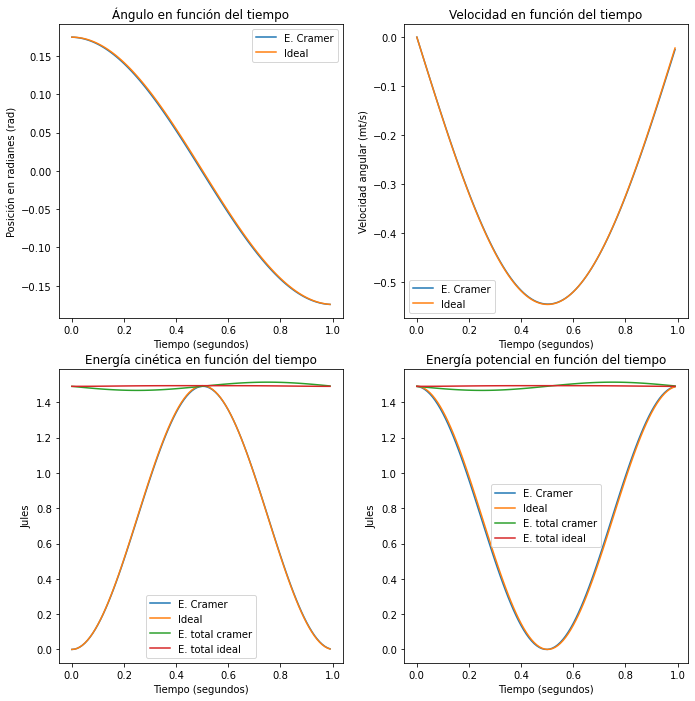

In [98]:
time2, theta2, theta_dot2, \
theta_dot_dot2, kinetic_e2, \
pot_e2 = ideal_mas(m=10, l=1,
                   theta0=10,
                   g=9.81,
                   ti=0,
                   tf=1,
                   delta=0.01)

pretty_plot(time1, theta1, theta_dot1, theta_dot_dot1, kinetic_e1, pot_e1,
            time2, theta2, theta_dot2, theta_dot_dot2, kinetic_e2, pot_e2 )


### Ángulos grandes: 

Para el sistema pendulo (masa atada a una cuerda rigida inextensible) asignando condiciones iniciales grafique
usando el modelo teórico, y el método de Euler-Cromer para ángulos grandes grafique:


***A) La posición angular como función del tiempo.***
$$$$
***B) Velocidad angular como función del tiempo.***
$$$$
***C) Velocidad angular como función del tiempo.***


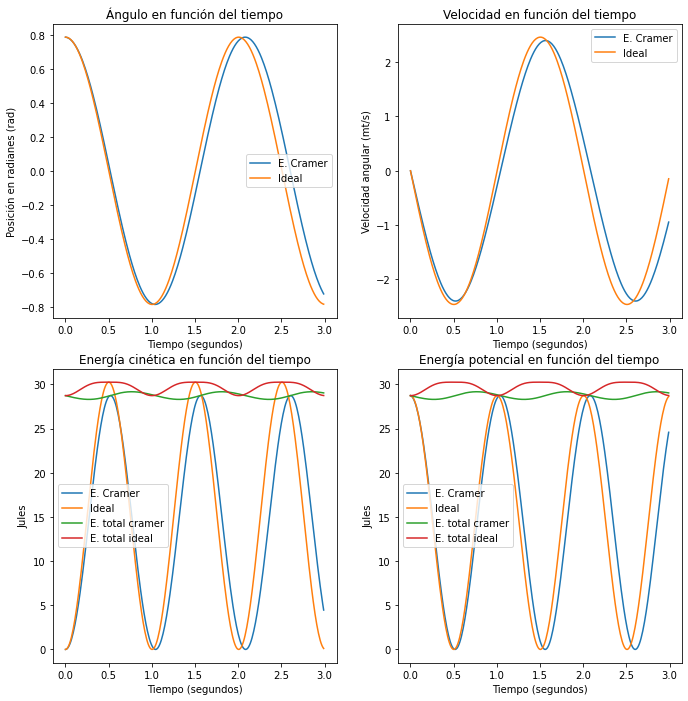

In [102]:
time1, theta1, theta_dot1, \
theta_dot_dot1, kinetic_e1, \
pot_e1 = euler_cromer_mas(m=10, l=1,
                          theta0=45,
                          g=9.81,
                          ti=0,
                          tf=3,
                          delta=0.01)

time2, theta2, theta_dot2, \
theta_dot_dot2, kinetic_e2, \
pot_e2 = ideal_mas(m=10, l=1,
                   theta0=45,
                   g=9.81,
                   ti=0,
                   tf=3,
                   delta=0.01)

pretty_plot(time1, theta1, theta_dot1, theta_dot_dot1, kinetic_e1, pot_e1,
            time2, theta2, theta_dot2, theta_dot_dot2, kinetic_e2, pot_e2 )


$$$$
***D) Construya un diagrama de velocidad angular como funcion de la posicion angular, cambie las condiciones iniciales primero cambiando la posición inicial en angulos con sentido fisico y con velocidad inicial cero. Luego Asigne un valor inicial a la velocidad angular e incremente este valor gradualmente. Realicelo en una única grafica:***

In [154]:
def pretty_plot2(theta_i: float, theta_f: float,
                 delta_theta: float,
                 theta_dot_i: float, theta_dot_f: float,
                 delta_theta_dot: float):
    
    """
    Calcula el movimiento armónico simple sin pérdidas.
    

    """
    
    theta_vec = np.arange(theta_i, theta_f, delta_theta)
    theta_dot_vec = np.arange(theta_dot_i, theta_dot_f, delta_theta_dot)
    
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    fig.tight_layout()
    fig.tight_layout(pad=3.0)
    
    for theta in theta_vec:
        
        time1, theta1, theta_dot1, \
        theta_dot_dot1, kinetic_e1, \
        pot_e1 = euler_cromer_mas(m=10, l=1,
                                   theta0=theta,
                                   g=9.81,
                                   ti=0,
                                   tf=3,
                                   delta=0.01)



    axs[0,0].set_title("Ángulo en función del tiempo [Cramer]")
    axs[0,0].set_xlabel("Posición en radianes (rad)")
    axs[0,0].set_ylabel("Velocidad angular (rad/s)")
    
    axs[0,1].set_title("Ángulo en función del tiempo [Ideal]")
    axs[0,1].set_xlabel("Posición en radianes (rad)")
    axs[0,1].set_ylabel("Velocidad angular (rad/s)")

    
    for theta_dot in theta_dot_vec:

        time1, theta1, theta_dot1, \
        theta_dot_dot1, kinetic_e1, \
        pot_e1 = euler_cromer_mas(m=10, l=1,
                                   theta0=10,
                                   g=9.81,
                                   ti=0,
                                   tf=4,
                                   delta=0.01,
                                   theta_dot_i= theta_dot)

        time2, theta2, theta_dot2, \
        theta_dot_dot2, kinetic_e2, \
        pot_e2 = euler_cromer_mas(m=10, l=1,
                                  theta0=10,
                                  g=9.81,
                                  ti=0,
                                  tf=4,
                                  delta=0.01, 
                                  theta_dot_i = theta_dot)

        axs[1,0].plot(theta1, theta_dot1)
    
    plt.show()
    
    pass 

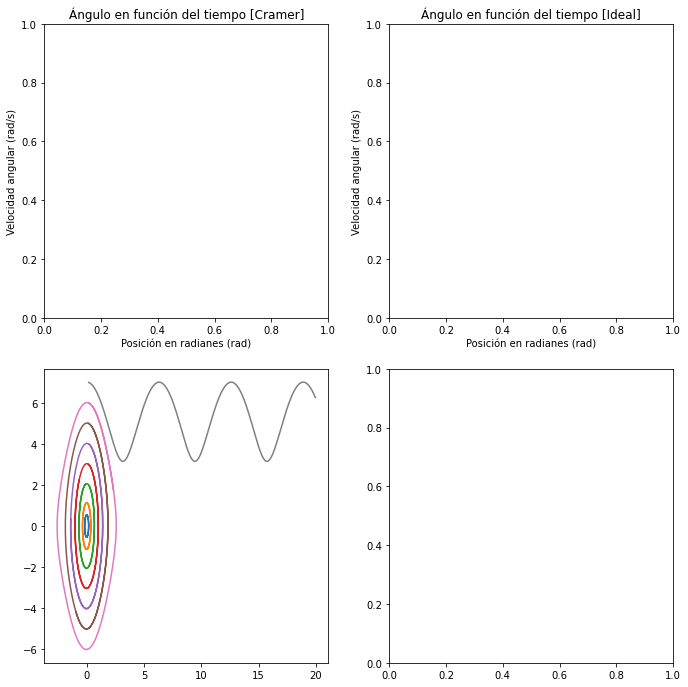

In [158]:
pretty_plot2(theta_i = 5, theta_f= 45,
             delta_theta= 5,
             theta_dot_i=0, theta_dot_f=8,
             delta_theta_dot= 1
             )